# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Furqan Al Ghifari Zulva
- **Email:** alghifarifurqan03@gmail.com
- **ID Dicoding:** furqan_al

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 pada stasiun Aotizhongxin dalam jangka waktu dari tanggal 2013-03-01 sampai 2014-01-01 ?
- Bagaimana tren konsentrasi PM10 pada stasiun Aotizhongxin dalam jangka waktu dari tanggal 2013-03-01 sampai 2014-01-01 ?
- Jumlah curah hujan pada stasiun Aotizhongxin dalam jangka waktu dari tanggal 2013-03-01 sampai 2014-01-01 ?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor library yang akan digunakan
import os
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Path ke folder yang berisi file-file CSV yang akan dibaca
folder_path = './PRSA_Data_20130301-20170228/'

# Inisialisasi list untuk menyimpan dataframes dari setiap file CSV
dataframes = []

# Iterasi melalui setiap file dalam folder
for filename in os.listdir(folder_path):
    # Memeriksa apakah file merupakan file CSV
    if filename.endswith('.csv'):
        # Mendapatkan path lengkap dari file
        file_path = os.path.join(folder_path, filename)
        # Membaca file CSV dan menyimpannya sebagai dataframe
        dataframe = pd.read_csv(file_path)
        # Menambahkan dataframe ke dalam list dataframes
        dataframes.append(dataframe)

# Menggabungkan semua dataframes menjadi satu dataframe tunggal
df = pd.concat(dataframes, ignore_index=True)

### Assessing Data

#### Missing values

Missing Value adalah hilangnya beberapa data yang telah diperoleh. Missing value jika tidak diatasi akan berdampak pada proses pengambilan data kedepannya. 
Untuk kita perlu memeriksa jumlah baris yang bernilai NaN dan menghapusnya

In [3]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Pada output diatas, terdapat banyak sekali missing value pada dataset kita.

#### Duplicate data

Selain memeriksa missing value, kita juga harus memeriksa apakah ada data yang duplikat pada dataset kita.

In [4]:
df.duplicated().sum()

0

Hasil pemeriksaan bahwa didalam dataset kita tidak terdapat data duplikat. yang terdapat hanyalah missing value, untuk itu kita akan menghapus data tersebut. 

### Cleaning Data

Penghapusan data dilakukan pada baris-baris yang mengandung missing value.

In [5]:
# menghapus beberapa baris yang mengandung nilai NaN
df.dropna(axis=0, inplace=True)

Setelah missing value dihapus, index pada dataset biasanya akan tidak berurutan lagi dikarenakan beberapa data telah dihapus dari dataset. Untuk itu, kita harus mereset ulang index pada dataset agar index kembali sesuai urutan.

In [6]:
df.reset_index(drop=True, inplace=True)

Kolom-kolom pada dataset yang tidak diperlukan akan langsung dihapus 

In [7]:
# dropping kolom No dikarenakan tidak memerlukannya
df = df.drop(['No'], axis=1)

Kemudian lakukan pengecekan untuk memastikan apakah masih terdapat nilai NaN pada dataset

In [8]:
# memeriksa apakah masih tersisa nilai NaN pada dataframe
df.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dapat dilihat, tidak terdapat nilai missing value pada dataset maka kita sudah bisa melanjutkan ke tahap selanjutnya yaitu Exploratory Data Analysis 

## Exploratory Data Analysis (EDA)

### Explore statistics parameter

Sebelum dataset digunakan untuk dilakukan analisis, kita akan melakukan eksplorasi terlebih dahulu untuk lebih mengenal dengan data yang sedang kita gunakan. Beberapa hal seperti jumlah baris, jumlah kolom beserta tipe data masing-masing kolom, dan lain-lain.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382168 entries, 0 to 382167
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     382168 non-null  int64  
 1   month    382168 non-null  int64  
 2   day      382168 non-null  int64  
 3   hour     382168 non-null  int64  
 4   PM2.5    382168 non-null  float64
 5   PM10     382168 non-null  float64
 6   SO2      382168 non-null  float64
 7   NO2      382168 non-null  float64
 8   CO       382168 non-null  float64
 9   O3       382168 non-null  float64
 10  TEMP     382168 non-null  float64
 11  PRES     382168 non-null  float64
 12  DEWP     382168 non-null  float64
 13  RAIN     382168 non-null  float64
 14  wd       382168 non-null  object 
 15  WSPM     382168 non-null  float64
 16  station  382168 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 49.6+ MB


Selain itu, kita juga perlu mengetahui ringkasan statistik deskriptif dari dataset seperti mean, nilai maksimum, nilai minimum, median, mode, dan lain-lain.

In [10]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Pada visualisasi dibawah, saya ingin melihat distribusi persebaran data pada kolom-kolom yang ingin saya lakukan visualisasi dan ambil kesimpulan.

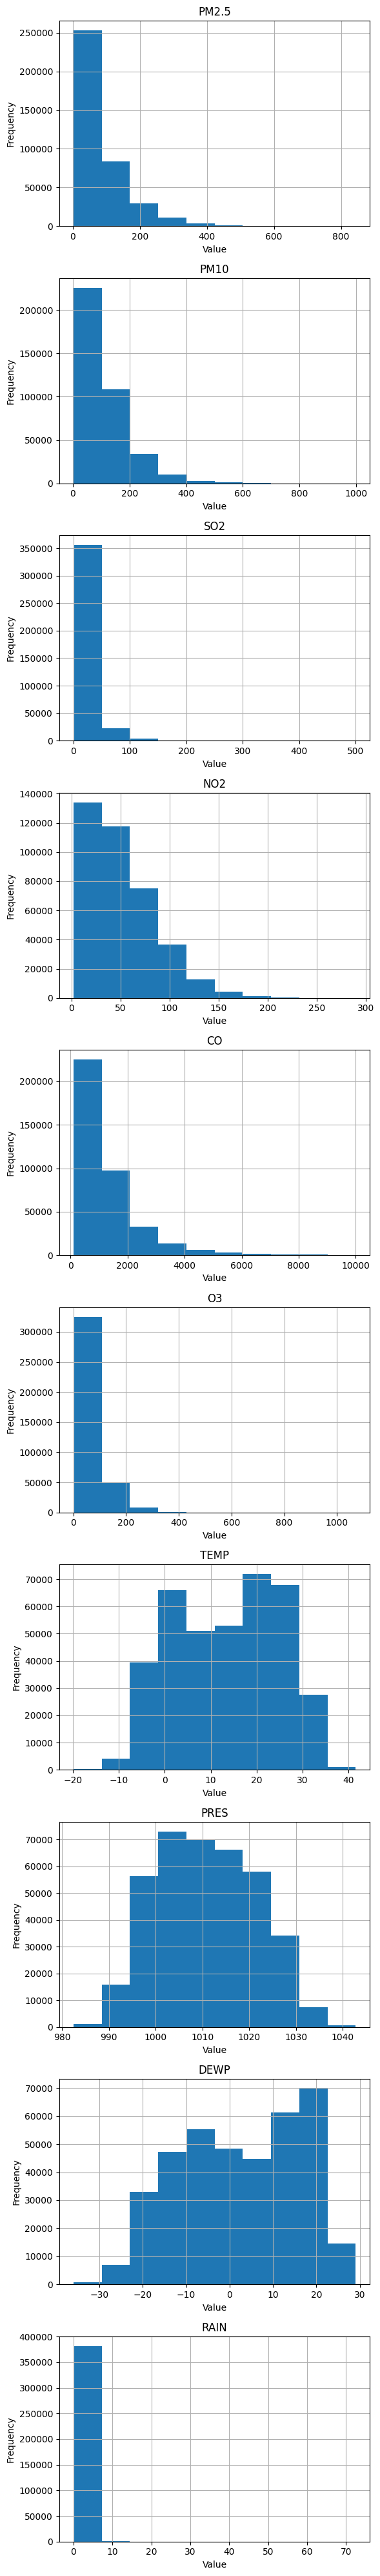

In [11]:
# menampilkan plot untuk beberapa kolom
columns = df.columns.tolist()[4:14]

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(6, 4*len(columns)))

for i, column in enumerate(columns):
    df[column].hist(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada tahap ini, kita akan melakukan analisis terhadap tren konsentrasi PM2.5 di stasiun pemantau udara Aotizhongxin. Data yang akan digunakan meliputi rentang waktu dari 1 Maret 2013 hingga 1 Januari 2014. Tujuan dari analisis ini adalah untuk memahami fluktuasi konsentrasi PM2.5 selama periode waktu tersebut dan mengidentifikasi pola atau tren yang mungkin terjadi. 

In [12]:
# membuat kolom baru yang merepresentasikan tanggal
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [13]:
# mengambil dataset dari stasiun Aotizhongxin
df1 = df[df['station'] == 'Aotizhongxin']

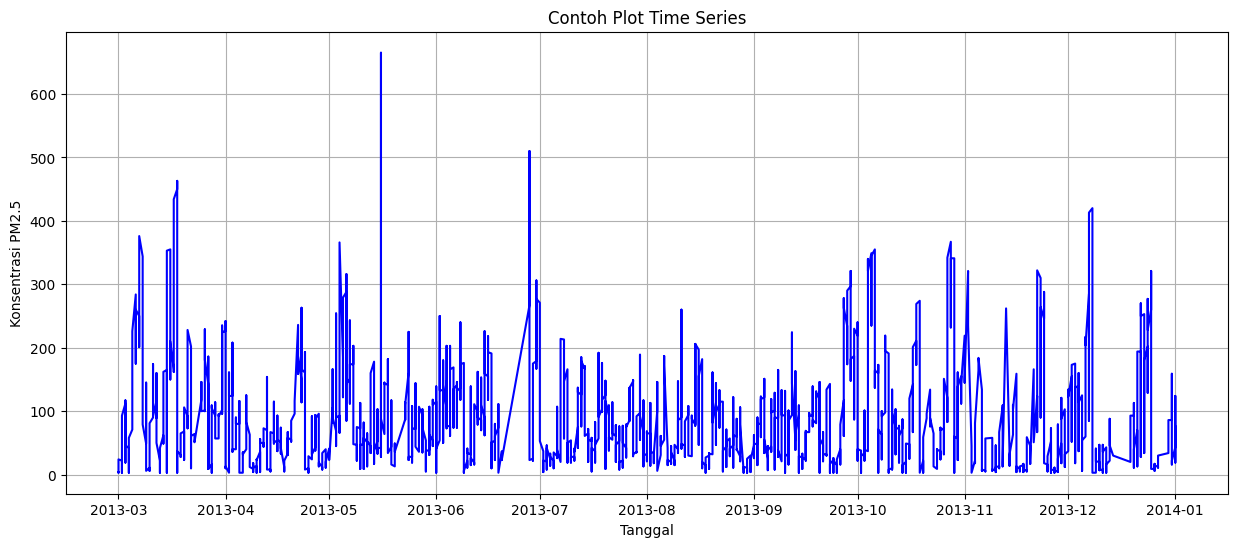

In [14]:
start_date = '2013-03-01'
end_date = '2014-01-01'

filtered_df1 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

plt.figure(figsize=(15, 6))
# plt.plot(filtered_df1['date'], filtered_df1['NO2'], color='red', linestyle=':')  # plot tren konsentrasi PM2.5
plt.plot(filtered_df1['date'], filtered_df1['PM2.5'], color='blue', linestyle='-')  # plot tren Suhu
plt.title('Contoh Plot Time Series')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

### Pertanyaan 2:

Pada tahap ini, kita akan melakukan analisis terhadap tren konsentrasi PM10 di stasiun pemantau udara Aotizhongxin. Data yang akan digunakan meliputi rentang waktu dari 1 Maret 2013 hingga 1 Januari 2014. Tujuan dari analisis ini adalah untuk memahami fluktuasi konsentrasi PM10 selama periode waktu tersebut dan mengidentifikasi pola atau tren yang mungkin terjadi.

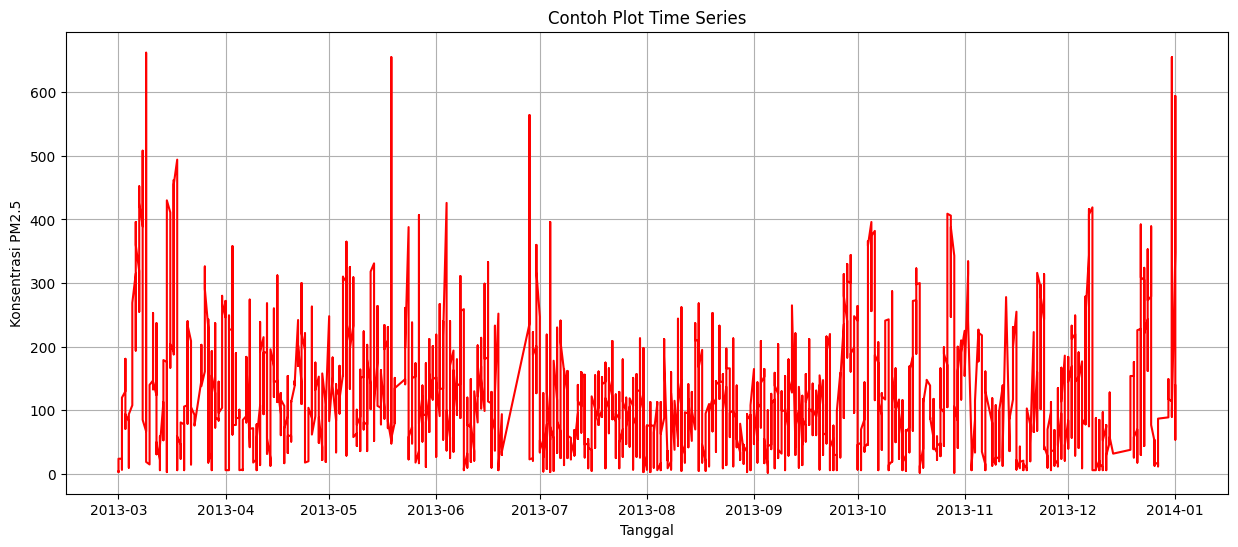

In [15]:
start_date = '2013-03-01'
end_date = '2014-01-01'

filtered_df1 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

plt.figure(figsize=(15, 6))
# plt.plot(filtered_df1['date'], filtered_df1['NO2'], color='red', linestyle=':')  # plot tren konsentrasi PM2.5
plt.plot(filtered_df1['date'], filtered_df1['PM10'], color='red', linestyle='-')  # plot tren Suhu
plt.title('Contoh Plot Time Series')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

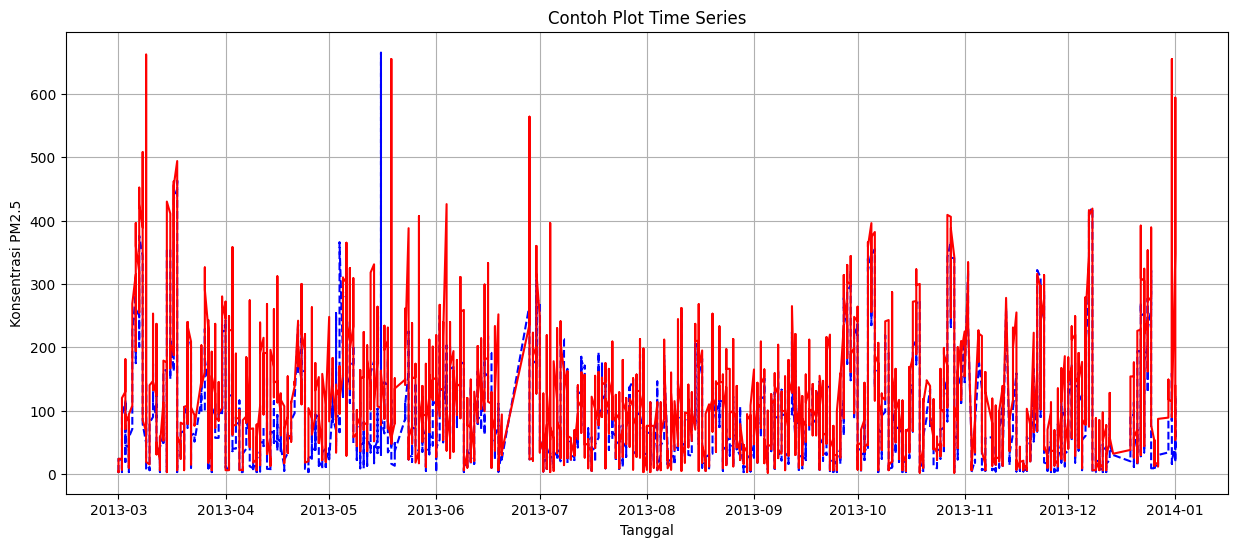

In [16]:
start_date = '2013-03-01'
end_date = '2014-01-01'

filtered_df1 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

plt.figure(figsize=(15, 6))
plt.plot(filtered_df1['date'], filtered_df1['PM2.5'], color='blue', linestyle='--')  # plot tren konsentrasi PM2.5
plt.plot(filtered_df1['date'], filtered_df1['PM10'], color='red', linestyle='-')  # plot tren konsentrasi PM10
plt.title('Contoh Plot Time Series')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

Dalam plot perbandingan antara konsentrasi PM2.5 dan PM10 pada stasiun pemantau udara Aotizhongxin, terlihat bahwa kedua plot hampir memiliki tingkat fluktuasi yang sama selama periode waktu yang diamati. Hal ini menunjukkan adanya korelasi yang kuat antara konsentrasi PM2.5 dan PM10 di lokasi tersebut. 

### Pertanyaan 3:

Terakhir, analisis dilakukan terhadap tren curah hujan di stasiun pemantau udara Aotizhongxin. Data yang akan digunakan meliputi rentang waktu dari 1 Maret 2013 hingga 1 Januari 2014. Tujuan dari analisis ini adalah untuk memahami fluktuasi curah hujan selama periode waktu tersebut dan mengidentifikasi pola atau tren yang mungkin terjadi.

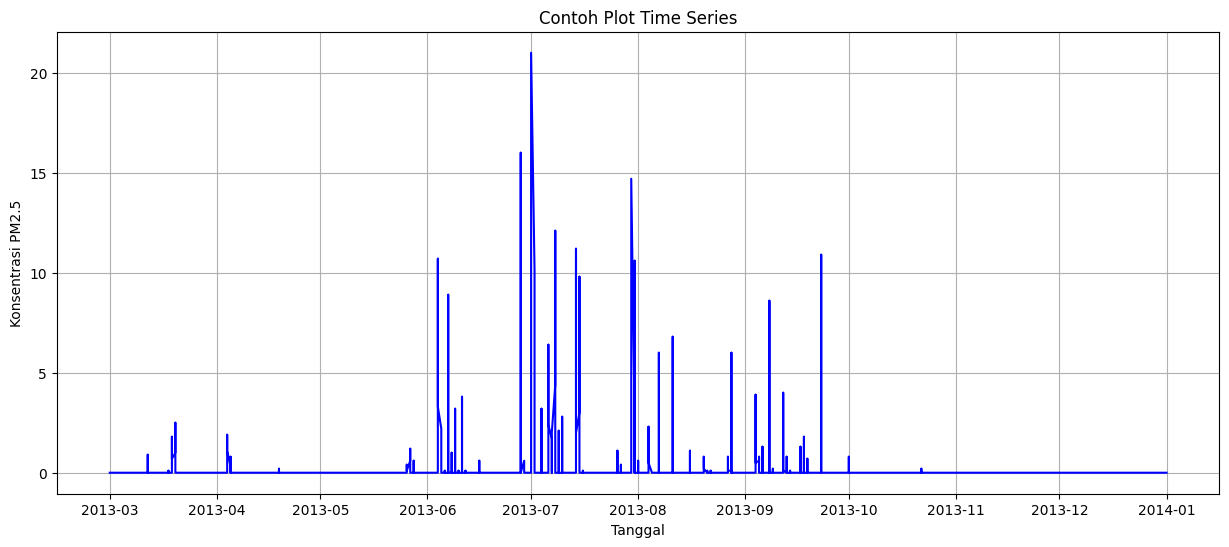

In [17]:
start_date = '2013-03-01'
end_date = '2014-01-01'

filtered_df1 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]

plt.figure(figsize=(15, 6))
# plt.plot(filtered_df1['date'], filtered_df1['NO2'], color='red', linestyle=':')  # plot tren konsentrasi PM2.5
plt.plot(filtered_df1['date'], filtered_df1['RAIN'], color='blue', linestyle='-')  # plot tren curah hujan
plt.title('Contoh Plot Time Series')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Analisis tren konsentrasi PM2.5 dari Maret 2013 hingga Januari 2014 mengungkapkan fluktuasi yang signifikan. Dalam rentang waktu tersebut, terlihat peningkatan bertahap sejak sebelum Oktober 2013 hingga awal tahun 2014, meskipun mengalami penurunan pada akhir tahun. Puncak konsentrasi PM2.5 tercatat pada bulan Mei.
- Conclution pertanyaan 2 : Tren konsentrasi PM10 menunjukkan pola serupa dengan PM2.5, menampilkan fluktuasi yang sejalan. Pada bulan-bulan menjelang akhir tahun, teramati konsentrasi PM10 yang meningkat secara signifikan.
- Conclution pertanyaan 3 : Dalam visualisasi tren curah hujan dari Maret 2013 hingga Januari 2014, mencatatkan titik tertinggi curah hujan menjelang bulan Juli sedangkan pada bulan-bulan menjelang akhir tahun memiliki tingkat frekuensi hujan yang rendah.